This notebook is used to analyze the text features from the t-scan model.
The output of the anaysis is a machine learning model that predicts the AVI score of a text based on the text features.

In [78]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



In [79]:
# Load the data into a pandas dataframe
data = pd.read_csv('results.csv', index_col=False)
data.head()

,Inputfile,Par_per_doc,Zin_per_doc,Word_per_doc,Alpino_status,wrd_freq_log_zn_corr,wrd_freq_zn_log,Conc_nw_ruim_p,Conc_nw_strikt_p,Alg_nw_d,...,Log_prob_bwd_inhwrd_zn,Entropie_bwd,Entropie_bwd_norm,Perplexiteit_bwd,Perplexiteit_bwd_norm,Eigen_classificatie,LiNT_score1,LiNT_niveau1,LiNT_score2,LiNT_niveau2
0,input/AVI_1_muis_henk_is_niet_bang.txt,1,21,184,0,4.82067,4.82067,0.687500,0.625000,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,24.8352,1,23.8926,1
1,input/AVI_3_ongeluk.txt,3,23,211,0,5.22221,5.11052,0.645833,0.500000,4.73934,...,NaN,NaN,NaN,NaN,NaN,NaN,19.0413,1,19.8608,1
2,input/AVI_5_op_schoolreis.txt,4,20,238,0,4.86412,4.79740,0.755102,0.469388,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,29.6614,1,29.1732,1
3,input/AVI_8_Een_tragisch_ongeval.txt,2,13,158,0,4.17837,3.83050,0.540541,0.405405,31.64560,...,NaN,NaN,NaN,NaN,NaN,NaN,47.9303,3,45.4634,2
4,input/AVI_3_een_kwade_kapster.txt,5,26,208,0,5.07854,5.07854,0.928571,0.892857,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,19.4064,1,16.1984,1


In [80]:
# Place the AVI score in a separate variable
# Currently it is in the title column and we need to extract it
first_column = data['Inputfile']
# Extract AVI scores from strings
avi_scores = [s.split('_')[1] for s in first_column]

# Add the AVI scores to the dataframe
data.insert(1, 'AVI', avi_scores)
# Make the avi the second column

In [81]:
data.head()

,Inputfile,AVI,Par_per_doc,Zin_per_doc,Word_per_doc,Alpino_status,wrd_freq_log_zn_corr,wrd_freq_zn_log,Conc_nw_ruim_p,Conc_nw_strikt_p,...,Log_prob_bwd_inhwrd_zn,Entropie_bwd,Entropie_bwd_norm,Perplexiteit_bwd,Perplexiteit_bwd_norm,Eigen_classificatie,LiNT_score1,LiNT_niveau1,LiNT_score2,LiNT_niveau2
0,input/AVI_1_muis_henk_is_niet_bang.txt,1,1,21,184,0,4.82067,4.82067,0.687500,0.625000,...,NaN,NaN,NaN,NaN,NaN,NaN,24.8352,1,23.8926,1
1,input/AVI_3_ongeluk.txt,3,3,23,211,0,5.22221,5.11052,0.645833,0.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,19.0413,1,19.8608,1
2,input/AVI_5_op_schoolreis.txt,5,4,20,238,0,4.86412,4.79740,0.755102,0.469388,...,NaN,NaN,NaN,NaN,NaN,NaN,29.6614,1,29.1732,1
3,input/AVI_8_Een_tragisch_ongeval.txt,8,2,13,158,0,4.17837,3.83050,0.540541,0.405405,...,NaN,NaN,NaN,NaN,NaN,NaN,47.9303,3,45.4634,2
4,input/AVI_3_een_kwade_kapster.txt,3,5,26,208,0,5.07854,5.07854,0.928571,0.892857,...,NaN,NaN,NaN,NaN,NaN,NaN,19.4064,1,16.1984,1


In [82]:
# Save the data to a new csv file
data.to_csv('results_with_avi.csv', index=False)

In [83]:
# Keep these columns and drop the rest
columns_to_keep = ['Wrd_per_zin','Bijzin_per_zin','Pers_vnw_d', 'AVI', "AL_max"]
# Select only the columns you want to keep
data_filtered = data[columns_to_keep]

In [84]:
data_filtered.head()

,Wrd_per_zin,Bijzin_per_zin,Pers_vnw_d,AVI,AL_max
0,8.76190,0.238095,163.04300,1,2.66667
1,9.17391,0.217391,99.52610,3,3.88782
2,11.90000,0.250000,79.83190,5,4.84375
3,12.15380,0.615385,6.32911,8,4.98611
4,8.00000,0.076923,144.23100,3,2.91778


In [85]:
# Define test and train data
X = data_filtered.drop(columns=['AVI'])
y = data_filtered['AVI']

In [86]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [88]:
print(X_train)

    Wrd_per_zin  Bijzin_per_zin  Pers_vnw_d    AL_max
12     11.41180        0.352941    82.47420  3.953120
32      9.88235        0.176471    95.23810  4.352940
9       6.80000        0.066667   147.05900  2.666670
0       8.76190        0.238095   163.04300  2.666670
4       8.00000        0.076923   144.23100  2.917780
16      8.63475        0.248227    50.10270  3.319150
17      5.50000        0.000000   162.33800  1.285710
5      14.50000        1.000000    45.97700  6.222220
13     17.50000        1.166670    38.09520  8.000000
11      4.35000        0.000000   103.44800  0.771429
1       9.17391        0.217391    99.52610  3.887820
2      11.90000        0.250000    79.83190  4.843750
30     16.64290        0.857143    30.04290  9.214290
3      12.15380        0.615385     6.32911  4.986110
29      5.75000        0.142857   105.59000  1.250000
23     14.22220        0.666667    93.75000  6.261110
31      5.43750        0.062500   206.89700  1.125000
22     12.22220        0.500

In [89]:

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.42857142857142855
              precision    recall  f1-score   support

           1       0.50      1.00      0.67         1
           2       0.00      0.00      0.00         1
           3       0.33      1.00      0.50         1
           4       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           8       1.00      0.50      0.67         2

    accuracy                           0.43         7
   macro avg       0.31      0.42      0.31         7
weighted avg       0.40      0.43      0.36         7



/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [90]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.42857142857142855
              precision    recall  f1-score   support

           1       0.50      1.00      0.67         1
           2       0.00      0.00      0.00         1
           3       0.33      1.00      0.50         1
           4       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           8       1.00      0.50      0.67         2

    accuracy                           0.43         7
   macro avg       0.31      0.42      0.31         7
weighted avg       0.40      0.43      0.36         7



/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Text(0.5, 0.9375, 'x[1] <= 0.542\ngini = 0.848\nsamples = 27\nvalue = [6, 3, 3, 2, 3, 2, 6, 2]'),
 Text(0.2, 0.8125, 'x[3] <= 1.33\ngini = 0.82\nsamples = 20\nvalue = [6, 3, 3, 1, 3, 2, 0, 2]'),
 Text(0.1, 0.6875, 'gini = 0.0\nsamples = 5\nvalue = [5, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.3, 0.6875, 'x[1] <= 0.072\ngini = 0.836\nsamples = 15\nvalue = [1, 3, 3, 1, 3, 2, 0, 2]'),
 Text(0.2, 0.5625, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0, 0, 0, 0, 0, 0]'),
 Text(0.4, 0.5625, 'x[2] <= 97.382\ngini = 0.806\nsamples = 12\nvalue = [1, 0, 3, 1, 3, 2, 0, 2]'),
 Text(0.2, 0.4375, 'x[0] <= 9.259\ngini = 0.719\nsamples = 8\nvalue = [0, 0, 0, 1, 3, 2, 0, 2]'),
 Text(0.1, 0.3125, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 0, 0, 0, 0, 2]'),
 Text(0.3, 0.3125, 'x[2] <= 78.838\ngini = 0.611\nsamples = 6\nvalue = [0, 0, 0, 1, 3, 2, 0, 0]'),
 Text(0.2, 0.1875, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 0, 0, 2, 0, 0]'),
 Text(0.4, 0.1875, 'x[2] <= 88.856\ngini = 0.375\nsamples = 4\nvalue = [0, 0, 0, 1, 

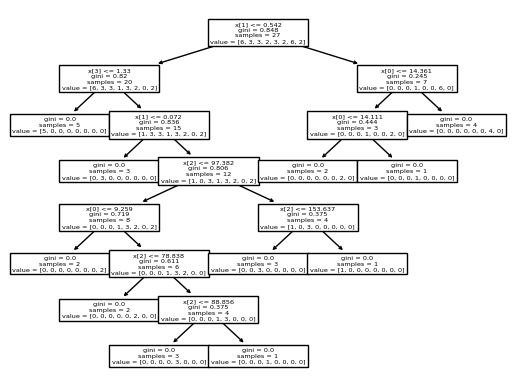

In [91]:
tree.plot_tree(model)

In [92]:
feature_importances = model.feature_importances_
feature_names = X.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

          Feature  Importance
1  Bijzin_per_zin    0.333842
2      Pers_vnw_d    0.331311
3          AL_max    0.168932
0     Wrd_per_zin    0.165915
